In [7]:
from __future__ import print_function
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std

a= np.random.seed(100)
print(a)

None


In [0]:
nsample = 100
x = np.linspace(0, 10, 100)
X = np.column_stack((x, x**2))
beta = np.array([1, 0.1, 10])
e = np.random.normal(size=nsample)

In [0]:
X = sm.add_constant(X)
y = np.dot(X, beta) + e

In [9]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.020e+06
Date:                Thu, 12 Dec 2019   Prob (F-statistic):          2.83e-239
Time:                        06:06:22   Log-Likelihood:                -146.51
No. Observations:                 100   AIC:                             299.0
Df Residuals:                      97   BIC:                             306.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3423      0.313      4.292      0.0

In [10]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  [ 1.34233516 -0.04024948 10.01025357]
R2:  0.9999879365025871


In [0]:
#OLS non-linear curve but linear in parameters
nsample = 50
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x-5)**2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.]

y_true = np.dot(X, beta)
y = y_true + sig *np.random.normal(size=nsample)

In [12]:
res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     236.7
Date:                Thu, 12 Dec 2019   Prob (F-statistic):           5.80e-28
Time:                        06:34:54   Log-Likelihood:                -31.893
No. Observations:                  50   AIC:                             71.79
Df Residuals:                      46   BIC:                             79.43
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5099      0.025     20.316      0.0

In [13]:
print('Parameters: ', res.params)
print('Standard Errors: ', res.bse)
print('Predicted Value: ', res.predict())

Parameters:  [ 0.50985175  0.55547804 -0.022245    5.01300174]
Standard Errors:  [0.02509546 0.09865319 0.0022034  0.16271989]
Predicted Value:  [ 4.45687674  4.9725521   5.44459089  5.84272001  6.14759182  6.35396279
  6.47155505  6.52345908  6.54233999  6.56507073  6.62667399  6.75456804
  6.96406202  7.25584068  7.61585186  8.01761524  8.42657298  8.80576747
  9.12191335  9.35086622  9.4815895   9.51796768  9.47816814  9.39165627
  9.29435442  9.22273996  9.20785211  9.27019234  9.41635598  9.63794868
  9.91296554 10.20940648 10.49053372 10.72090774 10.87220989 10.92789502
 10.88590983 10.75903025 10.57276234 10.36115173 10.16119006 10.00673728
  9.92295865  9.92219009 10.00191142 10.14516049 10.32331993 10.50081896
 10.64097753 10.71203277]


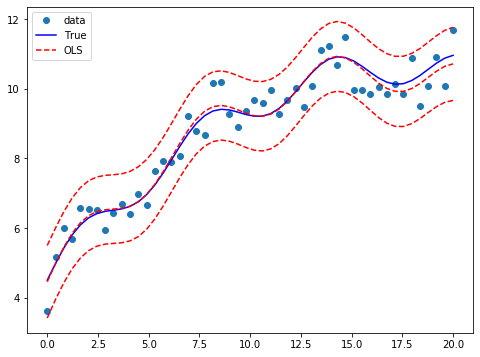

In [14]:
prstd, iv_l, iv_u = wls_prediction_std(res)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label="data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res.fittedvalues, 'r--', label="OLS")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
ax.legend(loc='best')

In [0]:
#OLS with dummy variables
nsample = 50
groups = np.zeros(nsample, int)
groups[20:40] = 1
groups[40:] = 2

dummy = sm.categorical(groups, drop=True)
x = np.linspace(0, 20, nsample)

X = np.column_stack((x, dummy[:,1:]))
X = sm.add_constant(X, prepend=False)

beta = [1., 3, -3, 10]
y_true = np.dot(X, beta)
e = np.random.normal(size=nsample)
y = y_true + e

In [16]:
print(X[:5,:])
print(y[:5])
print(groups)
print(dummy[:5,:])

[[0.         0.         0.         1.        ]
 [0.40816327 0.         0.         1.        ]
 [0.81632653 0.         0.         1.        ]
 [1.2244898  0.         0.         1.        ]
 [1.63265306 0.         0.         1.        ]]
[ 8.8119824   9.85841707  9.87628037 10.39655743 11.74151653]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [18]:
res2 = sm.OLS(y, X).fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     568.3
Date:                Thu, 12 Dec 2019   Prob (F-statistic):           2.41e-36
Time:                        06:59:43   Log-Likelihood:                -70.313
No. Observations:                  50   AIC:                             148.6
Df Residuals:                      46   BIC:                             156.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0194      0.067     15.190      0.0

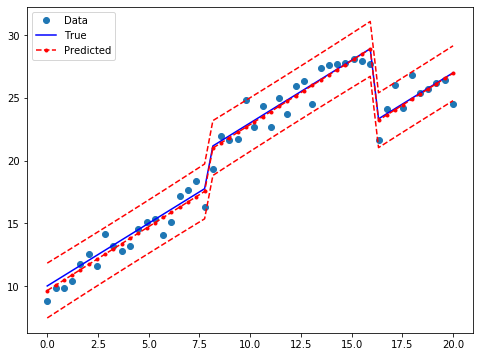

In [19]:
prstd, iv_l, iv_u = wls_prediction_std(res2)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y, 'o', label="Data")
ax.plot(x, y_true, 'b-', label="True")
ax.plot(x, res2.fittedvalues, 'r--.', label="Predicted")
ax.plot(x, iv_u, 'r--')
ax.plot(x, iv_l, 'r--')
legend = ax.legend(loc="best")

In [20]:
#Joint hypothesis test
#F-test

R = [[0, 1, 0, 0],[0, 0, 1, 0]]
print(np.array(R))
print(res2.f_test(R))

[[0 1 0 0]
 [0 0 1 0]]
<F test: F=array([[118.60168864]]), p=7.001100012458997e-19, df_denom=46, df_num=2>


In [21]:
print(res2.f_test("x2 = x3 = 0"))

<F test: F=array([[118.60168864]]), p=7.001100012458888e-19, df_denom=46, df_num=2>


In [0]:
#small group effects
beta = [1., 0.3, -0.0, 10]
y_true = np.dot(X, beta)
y = y_true + np.random.normal(size=nsample)

res3 = sm.OLS(y, X).fit()

In [27]:
print(res3.f_test(R))

<F test: F=array([[1.67391374]]), p=0.1987308359343001, df_denom=46, df_num=2>


In [28]:
print(res3.f_test(R))

<F test: F=array([[1.67391374]]), p=0.1987308359343001, df_denom=46, df_num=2>


In [29]:
print(res3.f_test("x2 = x3 = 0"))

<F test: F=array([[1.67391374]]), p=0.1987308359343001, df_denom=46, df_num=2>


In [35]:
#Multicollinearity
from statsmodels.datasets.longley import load_pandas
y = load_pandas().endog
X = load_pandas().exog
X = sm.add_constant(X)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [36]:
ols_model = sm.OLS(y, X)
ols_results = ols_model.fit()
print(ols_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 TOTEMP   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     330.3
Date:                Thu, 12 Dec 2019   Prob (F-statistic):           4.98e-10
Time:                        07:14:39   Log-Likelihood:                -109.62
No. Observations:                  16   AIC:                             233.2
Df Residuals:                       9   BIC:                             238.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.482e+06    8.9e+05     -3.911      0.0

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [0]:
norm_x = X.values
for i, name in enumerate(X):
    if name == "const":
        continue
    norm_x[:,i] = X[name]/np.linalg.norm(X[name])
norm_xtx = np.dot(norm_x.T,norm_x)

In [38]:
eigs = np.linalg.eigvals(norm_xtx)
condition_number = np.sqrt(eigs.max() / eigs.min())
print(condition_number)

56240.87037739987


In [39]:
ols_results2 = sm.OLS(y.iloc[:14], X.iloc[:14]).fit()
print("Percentage change %4.2f%%\n"*7 % tuple([i for i in (ols_results2.params - ols_results.params)/ols_results.params*100]))

Percentage change 4.55%
Percentage change -2228.01%
Percentage change 154304695.31%
Percentage change 1366329.02%
Percentage change 1112549.36%
Percentage change 92708715.91%
Percentage change 817944.26%



In [0]:
infl = ols_results.get_influence()

In [41]:
2./len(X)**.5

0.5

In [42]:
print(infl.summary_frame().filter(regex="dfb"))

    dfb_const  dfb_GNPDEFL  ...        dfb_POP      dfb_YEAR
0   -0.016406  -169.822675  ...  207954.113589 -31969.158503
1   -0.020608  -187.251727  ...   25343.938290 -29760.155888
2   -0.008382   -65.417834  ...  107465.770565 -29593.195253
3    0.018093   288.503914  ...  456190.215133 -36213.129569
4    1.871260  -171.109595  ... -389122.401699 -49905.782854
5   -0.321373  -104.123822  ...  144354.586054 -28985.057609
6    0.315945  -169.413317  ... -107413.074918 -32984.462465
7    0.015816   -69.343793  ...   92843.959345 -29724.975873
8   -0.004019   -86.903523  ...   83931.635336 -29563.619222
9   -1.018242  -201.315802  ...   18392.575057 -29203.217108
10   0.030947   -78.359439  ...   93617.648517 -29846.022426
11   0.005987  -100.926843  ...   95414.217290 -29690.904188
12  -0.135883   -32.093127  ...  258559.048569 -29296.334617
13   0.032736   -78.513866  ...  104434.061226 -30025.564763
14   0.305868   -16.833121  ...  275103.677859 -36060.612522
15  -0.538323   102.0271

/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:695: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:729: RuntimeWarning: invalid value encountered in sqrt
  dffits_ = self.resid_studentized_internal * np.sqrt(hii / (1 - hii))
/usr/local/lib/python3.6/dist-packages/statsmodels/stats/outliers_influence.py:758: RuntimeWarning: invalid value encountered in 